In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1) Load data
url_train = "https://raw.githubusercontent.com/magnus-engstroem/IE500-Data-Mining/main/Selected_data/train.csv"
train  = pd.read_csv(url_train)

print(df_train.head())

url = "https://raw.githubusercontent.com/magnus-engstroem/IE500-Data-Mining/main/Selected_data/test.csv"
test   = pd.read_csv( url)
print(df_test.head())


# 2) Split features/target
X_train = train.drop(columns=["is_benign"])
y_train = train["is_benign"]

X_test  = test.drop(columns=["is_benign"])
y_test  = test["is_benign"]

# 3) Train a basic Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# 4) Evaluate on test set
y_pred = dt.predict(X_test)

print("Baseline Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))


   Flow Duration  Fwd Packet Length Max  Fwd Packet Length Min  \
0         910918                    435                    0.0   
1        8034272                    559                    0.0   
2       22525345                    409                    0.0   
3         203385                   1350                   38.0   
4         514920                    528                    0.0   

   Fwd Packet Length Mean  Fwd Packet Length Std  Bwd Packet Length Max  \
0               71.647059             149.236365                   1448   
1              195.454545             261.894774                    508   
2               36.310345              99.655515                   1448   
3              694.666667             717.882349                   1350   
4              105.600000             236.128778                    290   

   Bwd Packet Length Min  Bwd Packet Length Mean  Bwd Packet Length Std  \
0                    0.0             1183.157895             429.871074   
1 

In [ ]:

df_train_features = df_train.drop("is_benign", axis=1)
df_train_target = df_train["is_benign"]
df_test_features = df_test.drop("is_benign", axis=1)
df_test_target = df_test["is_benign"]

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

dt = DecisionTreeClassifier(max_depth=10)
dt.fit(df_train_features, df_train_target)

print(dt.score(df_train_features, df_train_target))

from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(40,20))
tree.plot_tree(
    dt,
    feature_names=df_train_features.columns,
    class_names=['benign', 'malware'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

y_pred = dt.predict(df_test_features)
y_proba = dt.predict_proba(df_test_features)[:, 1]  # for ROC-AUC

print("Accuracy:", accuracy_score(df_test_target, y_pred))
print(classification_report(df_test_target, y_pred))
print("Confusion matrix:\n", confusion_matrix(df_test_target, y_pred))
print("ROC-AUC:", roc_auc_score(df_test_target, y_proba))

In [ ]:
#Baseline Decision Tree with class_weight="balanced"

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

dt_bal = DecisionTreeClassifier(
    random_state=42,
    class_weight="balanced"
)
dt_bal.fit(X_train, y_train)

y_pred_bal = dt_bal.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_bal))
print(confusion_matrix(y_test, y_pred_bal))
print(classification_report(y_test, y_pred_bal))


Accuracy: 0.9498587920527176
[[36712   912]
 [ 1112  1630]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     37624
           1       0.64      0.59      0.62      2742

    accuracy                           0.95     40366
   macro avg       0.81      0.79      0.80     40366
weighted avg       0.95      0.95      0.95     40366



In [ ]:
#Tuned Decision Tree with class_weight="balanced"

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X_sub, _, y_sub, _ = train_test_split(
    X_train, y_train,
    train_size=30000,
    stratify=y_train,
    random_state=42
)

X_tr, X_val, y_tr, y_val = train_test_split(
    X_sub, y_sub,
    test_size=0.2,
    stratify=y_sub,
    random_state=42
)

candidate_depths = list(range(2, 26, 2))
depth_scores_bal = {}

for d in candidate_depths:
    clf = DecisionTreeClassifier(
        max_depth=d,
        random_state=42,
        class_weight="balanced"
    )
    clf.fit(X_tr, y_tr)
    y_val_pred = clf.predict(X_val)
    score = f1_score(y_val, y_val_pred, pos_label=1)
    depth_scores_bal[d] = score
    print(f"Depth {d}: F1(class 1) = {score:.4f}")

best_depth_bal = max(depth_scores_bal, key=depth_scores_bal.get)
print("Best max_depth:", best_depth_bal)


Depth 2: F1(class 1) = 0.4846
Depth 4: F1(class 1) = 0.4984
Depth 6: F1(class 1) = 0.5311
Depth 8: F1(class 1) = 0.5418
Depth 10: F1(class 1) = 0.5617
Depth 12: F1(class 1) = 0.5833
Depth 14: F1(class 1) = 0.5809
Depth 16: F1(class 1) = 0.5956
Depth 18: F1(class 1) = 0.5963
Depth 20: F1(class 1) = 0.5924
Depth 22: F1(class 1) = 0.5949
Depth 24: F1(class 1) = 0.5875
Best max_depth: 18


In [11]:
dt_tuned_bal = DecisionTreeClassifier(
    max_depth=18,
    random_state=42,
    class_weight="balanced"
)
dt_tuned_bal.fit(X_train, y_train)

y_pred_tuned_bal = dt_tuned_bal.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_tuned_bal))
print(confusion_matrix(y_test, y_pred_tuned_bal))
print(classification_report(y_test, y_pred_tuned_bal))


Accuracy: 0.9324431452212257
[[35182  2442]
 [  285  2457]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96     37624
           1       0.50      0.90      0.64      2742

    accuracy                           0.93     40366
   macro avg       0.75      0.92      0.80     40366
weighted avg       0.96      0.93      0.94     40366



In [12]:
def tune_max_depth(X, y, class_weight=None, candidate_depths=range(2, 26, 2),
                   subsample_size=30000, random_state=42):
    """
    Tune max_depth of a DecisionTreeClassifier using F1-score for class 1
    on a validation set.
    """
    # Optional: subsample for faster tuning (stratified)
    if subsample_size is not None and len(X) > subsample_size:
        X_sub, _, y_sub, _ = train_test_split(
            X, y,
            train_size=subsample_size,
            stratify=y,
            random_state=random_state
        )
    else:
        X_sub, y_sub = X, y

    # Train/validation split
    X_tr, X_val, y_tr, y_val = train_test_split(
        X_sub, y_sub,
        test_size=0.2,
        stratify=y_sub,
        random_state=random_state
    )

    depth_scores = {}

    print("\nTuning max_depth (class_weight={}):".format(class_weight))
    for d in candidate_depths:
        clf = DecisionTreeClassifier(
            max_depth=d,
            random_state=random_state,
            class_weight=class_weight
        )
        clf.fit(X_tr, y_tr)
        y_val_pred = clf.predict(X_val)
        score = f1_score(y_val, y_val_pred, pos_label=1)
        depth_scores[d] = score
        print(f"  depth={d:2d}: F1(class 1) = {score:.4f}")

    best_depth = max(depth_scores, key=depth_scores.get)
    print(f"\nBest max_depth (class_weight={class_weight}) = {best_depth} "
          f"with F1(class 1) = {depth_scores[best_depth]:.4f}")

    return best_depth, depth_scores


In [13]:
# For models WITHOUT class_weight
best_depth_no_weight, scores_no_weight = tune_max_depth(
    X_train, y_train,
    class_weight=None
)

# For models WITH class_weight="balanced"
best_depth_balanced, scores_balanced = tune_max_depth(
    X_train, y_train,
    class_weight="balanced"
)

print("\nChosen depths:")
print("  For normal tree:      max_depth =", best_depth_no_weight)
print("  For balanced tree:    max_depth =", best_depth_balanced)



Tuning max_depth (class_weight=None):
  depth= 2: F1(class 1) = 0.0000
  depth= 4: F1(class 1) = 0.3955
  depth= 6: F1(class 1) = 0.3847
  depth= 8: F1(class 1) = 0.4620
  depth=10: F1(class 1) = 0.5080
  depth=12: F1(class 1) = 0.5239
  depth=14: F1(class 1) = 0.5411
  depth=16: F1(class 1) = 0.5370
  depth=18: F1(class 1) = 0.5470
  depth=20: F1(class 1) = 0.5394
  depth=22: F1(class 1) = 0.5436
  depth=24: F1(class 1) = 0.5372

Best max_depth (class_weight=None) = 18 with F1(class 1) = 0.5470

Tuning max_depth (class_weight=balanced):
  depth= 2: F1(class 1) = 0.4846
  depth= 4: F1(class 1) = 0.4984
  depth= 6: F1(class 1) = 0.5311
  depth= 8: F1(class 1) = 0.5418
  depth=10: F1(class 1) = 0.5617
  depth=12: F1(class 1) = 0.5833
  depth=14: F1(class 1) = 0.5809
  depth=16: F1(class 1) = 0.5956
  depth=18: F1(class 1) = 0.5963
  depth=20: F1(class 1) = 0.5924
  depth=22: F1(class 1) = 0.5949
  depth=24: F1(class 1) = 0.5875

Best max_depth (class_weight=balanced) = 18 with F1(class 

Train shape: (161462, 38) Test shape: (40366, 38)
Train class distribution:
 is_benign
0    0.933371
1    0.066629
Name: proportion, dtype: float64
Test class distribution:
 is_benign
0    0.932072
1    0.067928
Name: proportion, dtype: float64

Tuning max_depth (class_weight=None):
  depth= 2: F1(class 1) = 0.0000
  depth= 4: F1(class 1) = 0.3955
  depth= 6: F1(class 1) = 0.3847
  depth= 8: F1(class 1) = 0.4620
  depth=10: F1(class 1) = 0.5080
  depth=12: F1(class 1) = 0.5239
  depth=14: F1(class 1) = 0.5411
  depth=16: F1(class 1) = 0.5370
  depth=18: F1(class 1) = 0.5470
  depth=20: F1(class 1) = 0.5394
  depth=22: F1(class 1) = 0.5436
  depth=24: F1(class 1) = 0.5372

Best max_depth (class_weight=None) = 18 with F1(class 1) = 0.5470

Tuning max_depth (class_weight=balanced):
  depth= 2: F1(class 1) = 0.4846
  depth= 4: F1(class 1) = 0.4984
  depth= 6: F1(class 1) = 0.5311
  depth= 8: F1(class 1) = 0.5418
  depth=10: F1(class 1) = 0.5617
  depth=12: F1(class 1) = 0.5833
  depth=14: 

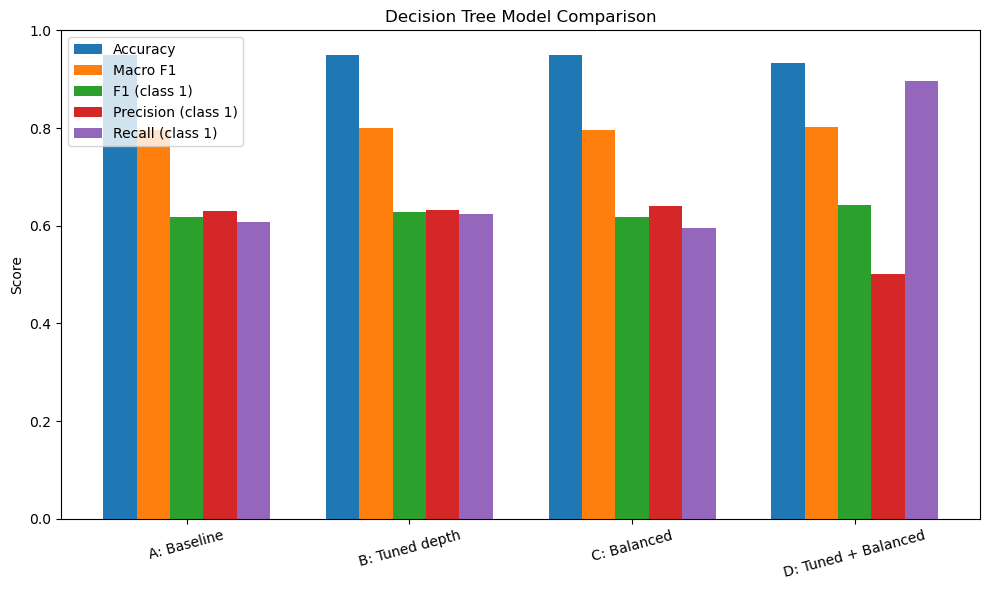

In [ ]:

# Decision Trees models


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    classification_report,
    confusion_matrix,
)
from sklearn.model_selection import train_test_split

train = df_train
test =  df_test

X_train = train.drop(columns=["is_benign"])
y_train = train["is_benign"]

X_test = test.drop(columns=["is_benign"])
y_test = test["is_benign"]

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Train class distribution:\n", y_train.value_counts(normalize=True))
print("Test class distribution:\n", y_test.value_counts(normalize=True))


#  evaluate a single model


def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    """
    Fit model, predict on test, print metrics, and return a dict with results.
    """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    macro_f1 = f1_score(y_test, y_pred, average="macro")
    f1_1 = f1_score(y_test, y_pred, pos_label=1)
    prec_1 = precision_score(y_test, y_pred, pos_label=1)
    rec_1 = recall_score(y_test, y_pred, pos_label=1)

    print(f"\n===== {name} =====")
    print("Accuracy:", acc)
    print("Macro F1:", macro_f1)
    print("F1 (class 1):", f1_1)
    print("Precision (class 1):", prec_1)
    print("Recall (class 1):", rec_1)

    print("\nConfusion matrix (rows = true, cols = pred):")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification report:")
    print(classification_report(y_test, y_pred))

    return {
        "Model": name,
        "Accuracy": acc,
        "Macro F1": macro_f1,
        "F1 (class 1)": f1_1,
        "Precision (class 1)": prec_1,
        "Recall (class 1)": rec_1,
    }



#  tune max_depth using F1(1)


def tune_max_depth(X, y, class_weight=None, candidate_depths=range(2, 26, 2),
                   subsample_size=30000, random_state=42):
    """
    Tune max_depth of a DecisionTreeClassifier using F1-score for class 1
    on a validation set.
    """
    # Optional: subsample for faster tuning (stratified)
    if subsample_size is not None and len(X) > subsample_size:
        X_sub, _, y_sub, _ = train_test_split(
            X, y,
            train_size=subsample_size,
            stratify=y,
            random_state=random_state
        )
    else:
        X_sub, y_sub = X, y

    # Train/validation split
    X_tr, X_val, y_tr, y_val = train_test_split(
        X_sub, y_sub,
        test_size=0.2,
        stratify=y_sub,
        random_state=random_state
    )

    depth_scores = {}

    print("\nTuning max_depth (class_weight={}):".format(class_weight))
    for d in candidate_depths:
        clf = DecisionTreeClassifier(
            max_depth=d,
            random_state=random_state,
            class_weight=class_weight
        )
        clf.fit(X_tr, y_tr)
        y_val_pred = clf.predict(X_val)
        score = f1_score(y_val, y_val_pred, pos_label=1)
        depth_scores[d] = score
        print(f"  depth={d:2d}: F1(class 1) = {score:.4f}")

    best_depth = max(depth_scores, key=depth_scores.get)
    print(f"\nBest max_depth (class_weight={class_weight}) = {best_depth} "
          f"with F1(class 1) = {depth_scores[best_depth]:.4f}")

    return best_depth, depth_scores



# Tune max_depth (B and D)


# For models WITHOUT class_weight
best_depth_no_weight, scores_no_weight = tune_max_depth(
    X_train, y_train,
    class_weight=None
)

# For models WITH class_weight="balanced"
best_depth_balanced, scores_balanced = tune_max_depth(
    X_train, y_train,
    class_weight="balanced"
)

print("\nChosen depths:")
print("  For normal tree:      max_depth =", best_depth_no_weight)
print("  For balanced tree:    max_depth =", best_depth_balanced)



# Train the 4 final DTs


results = []

# Model A: Baseline DT (no tuning, no class_weight)
model_A = DecisionTreeClassifier(random_state=42)
results.append(evaluate_model("A: Baseline", model_A, X_train, y_train, X_test, y_test))

# Model B: Tuned depth (no class_weight)
model_B = DecisionTreeClassifier(max_depth=best_depth_no_weight, random_state=42)
results.append(evaluate_model("B: Tuned depth", model_B, X_train, y_train, X_test, y_test))

# Model C: Balanced DT (no depth tuning)
model_C = DecisionTreeClassifier(random_state=42, class_weight="balanced")
results.append(evaluate_model("C: Balanced", model_C, X_train, y_train, X_test, y_test))

# Model D: Tuned + Balanced
model_D = DecisionTreeClassifier(
    max_depth=best_depth_balanced,
    random_state=42,
    class_weight="balanced"
)
results.append(evaluate_model("D: Tuned + Balanced", model_D, X_train, y_train, X_test, y_test))



# results in a DataFrame 


results_df = pd.DataFrame(results)
print("\n\n===== Summary table =====")
print(results_df)


#  comparison graph


metric_names = [
    "Accuracy",
    "Macro F1",
    "F1 (class 1)",
    "Precision (class 1)",
    "Recall (class 1)",
]

model_labels = results_df["Model"].tolist()
values = results_df[metric_names].values

x = np.arange(len(model_labels))
width = 0.15  # width of bars

plt.figure(figsize=(10, 6))

for i, metric in enumerate(metric_names):
    # shift each group of bars
    plt.bar(x + (i - 2) * width, values[:, i], width, label=metric)

plt.xticks(x, model_labels, rotation=15)
plt.ylim(0, 1.0)
plt.ylabel("Score")
plt.title("Decision Tree Model Comparison - Graph")
plt.legend()
plt.tight_layout()
plt.show()
